In [235]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from fiona.crs import from_epsg
from shapely.geometry import Point

In [236]:
path_exp= r"M:\NY4P Metrics Research 18034\05_GRAPHICS\Charts Graphs Diagrams\plt saves\190806_nhood health"

# load data
* data from DOHMH
* all scores data
* study area entrances
* nta polygons

In [26]:
#Park entrances for different neighborhood
bayst= gpd.read_file(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Walk-to-a-Park Summer 2019 Data\Walk-to-a-Park Summer 2019 Data\Walk-to-a-Park_BayStreetCorridorAccessPoints.shp")
bushwick= gpd.read_file(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Walk-to-a-Park Summer 2019 Data\Walk-to-a-Park Summer 2019 Data\Walk-to-a-Park_BushwickAccessPoints.shp")
lic1= gpd.read_file(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Walk-to-a-Park Summer 2019 Data\Walk-to-a-Park Summer 2019 Data\Walk-to-a-Park_LIC_Parks1acreorlessAccessPoints.shp")
lic2= gpd.read_file(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Walk-to-a-Park Summer 2019 Data\Walk-to-a-Park Summer 2019 Data\Walk-to-a-Park_LIC_Parks20acresorgreater.shp")
lic3= gpd.read_file(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Walk-to-a-Park Summer 2019 Data\Walk-to-a-Park Summer 2019 Data\Walk-to-a-Park_LIC_Parksbtwn1and20acresAccessPoints.shp")
lic= pd.concat([lic1,lic2,lic3],axis=0,sort=True)

In [86]:
nta= gpd.read_file(r"S:\NYC_GIS_DATA\NeighborhoodTabulationAreas\171128_NeighborhoodTabluationAreas\NTA\geo_export_439165cd-480d-4384-82d4-76251f54953e.shp")
nta= nta.to_crs({'init':'epsg:2263'})

In [87]:
nta.columns

Index(['shape_area', 'boro_name', 'ntacode', 'shape_leng', 'boro_code',
       'ntaname', 'county_fip', 'geometry'],
      dtype='object')

In [73]:
scores= gpd.read_file(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\Processed\190806_ALL_SCORES\190806_ALLSCORES.shp",index_col=0)

In [74]:
health= pd.read_csv(r"M:\HRA OneNYC 18039\03_GIS+ANALYSIS\01_DATA\DOHMH\DOHMH.csv").set_index('NTACode')

In [75]:
health.columns

Index(['FID', 'BoroCode', 'BoroName', 'CountyFIPS', 'NTAName', 'Shape_Leng',
       'Shape_Area', 'NTA_Name', 'NTA_Code', 'TotalPop',
       ...
       'NitricOxide', 'NitrogenDioxide', 'Ozone', 'SulfurDioxide', 'Daycares',
       'AlcoholRetailers', 'TobaccoRetailers', 'FelonyCrime', 'PropertyCrime',
       'ViolentCrime'],
      dtype='object', length=203)

# City-wide averages

In [191]:
health['ChildAsthmaHosp'].mean()
# The city average of childhood asthma, age-adjusted rate of asthma hospitalizations per 10,000 children ages 5-14

29.97743589743589

In [192]:
health['MedicaidChildAsthma'].mean()
# The city average of childhood asthma diagnoses per 100,000 children ages 2-17 who are continuously enrolled in Medicaid

12.317948717948719

In [193]:
health['BlackCarbon'].mean()
# Black Carbon annual average (absorbance units)

0.9528205128205124

In [194]:
health['SulfurDioxide'].mean()
# Winter average (ppb)

0.7169230769230772

In [195]:
health['Ozone'].mean()
# Ozone summer average (ppb)

29.76769230769231

In [196]:
health['PM25'].mean()
# Fine particulate matter (PM2.5) annual average in micrograms per cubic meter

8.944615384615386

In [197]:
health['PoorControlDiabAll'].mean()
# Percent of persons with poorly controlled diabestes ages 18 and older

16.808205128205135

In [198]:
health_indic= ['ChildAsthmaHosp','MedicaidChildAsthma','BlackCarbon','SulfurDioxide','Ozone','PM25','PoorControlDiabAll']

In [205]:
citywide= health[health_indic].mean()
citywide

ChildAsthmaHosp        29.977436
MedicaidChildAsthma    12.317949
BlackCarbon             0.952821
SulfurDioxide           0.716923
Ozone                  29.767692
PM25                    8.944615
PoorControlDiabAll     16.808205
dtype: float64

# Study Area Health Summaries
* Park NTAs

In [174]:
bayst_nta= gpd.sjoin(nta,bayst,op='intersects',how='inner').drop(['index_right','gispropnum','parkname','type'],axis=1)
bushwick_nta= gpd.sjoin(nta,bushwick,op='intersects',how='inner').drop(['index_right', 'gispropnum', 'parkname', 'OBJECTID_1', 'OBJECTID',
       'GARDENNAME', 'GARDENID', 'SHAPE_LENG', 'Acres', 'Acres2', 'acquisitio',
       'address', 'borough', 'class', 'commission', 'communityb', 'councildis',
       'department', 'eapply', 'gisobjid', 'gispropn_1', 'global_id',
       'jurisdicti', 'location', 'mapped', 'name311', 'nys_assemb',
       'nys_senate', 'omppropid', 'parentid', 'permit', 'permitdist',
       'permitpare', 'pip_ratabl', 'precinct', 'retired', 'signname',
       'subcategor', 'typecatego', 'url', 'us_congres', 'waterfront',
       'zipcode', 'Shape_Le_1', 'Shape_Area', 'Acres3'],axis=1)
lic_nta= gpd.sjoin(nta,lic,op='intersects',how='inner').drop(['index_right', 'Acre', 'Acre_1', 'Category', 'Category_1', 'County',
       'County_1', 'Descript', 'Descript_1', 'FID_1',
       'FID_12', 'FID_12_13', 'FID_12__14', 'Name', 'Name_1', 'Orig',
       'Orig_1', 'Region', 'Region_1', 'Shape_Ar_1', 'Shape_Area',
       'Shape_Le_1', 'Shape_Leng', 'Source', 'Source_1', 'Tot_acre',
       'Tot_acre_1', 'UID', 'UID_1', 'Update1', 'Update_', 'acquisit_1',
       'acquisitio', 'acres', 'acres_1', 'address', 'address_1', 'borough',
       'borough_1', 'class', 'class_1', 'commissi_1', 'commission',
       'communit_1', 'communityb', 'councild_1', 'councildis', 'departme_1',
       'department', 'eapply', 'eapply_1', 'gisobjid', 'gisobjid_1',
       'gispropn_1', 'gispropn_2', 'gispropn_3', 'gispropn_4', 'gispropnum',
       'global_i_1', 'global_id', 'jurisdic_1', 'jurisdicti', 'location',
       'location_1', 'mapped', 'mapped_1', 'name311', 'name311_1',
       'nys_asse_1', 'nys_assemb', 'nys_sena_1', 'nys_senate', 'objectid',
       'objectid_1', 'omppropi_1', 'omppropid', 'parentid', 'parentid_1',
       'parkname', 'parkname_1', 'parkname_2', 'permit', 'permit_1',
       'permitdi_1', 'permitdist', 'permitpa_1', 'permitpare', 'pip_rata_1',
       'pip_ratabl', 'precinct', 'precinct_1', 'retired', 'retired_1',
       'signname', 'signname_1', 'subcateg_1', 'subcategor', 'type',
       'typecate_1', 'typecatego', 'url', 'url_1', 'us_congr_1', 'us_congres',
       'waterfro_1', 'waterfront', 'zipcode', 'zipcode_1'],axis=1)

In [175]:
bayst_nta= bayst_nta[~bayst_nta.duplicated('ntaname')]
bushwick_nta= bushwick_nta[~bushwick_nta.duplicated('ntaname')].drop(192)
lic_nta= lic_nta[~lic_nta.duplicated('ntaname')]

__Visualizing Overlaps__

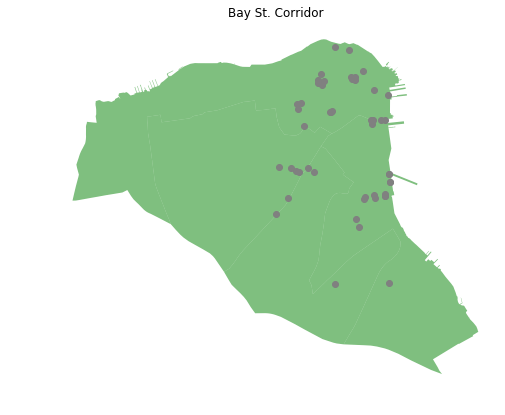

In [170]:
fig, ax= plt.subplots(1,figsize=(8,8))
bayst_nta.plot(ax=ax,color='green',alpha=.5)
bayst.plot(ax=ax,color='gray')
plt.axis('off')
plt.title('Bay St. Corridor');

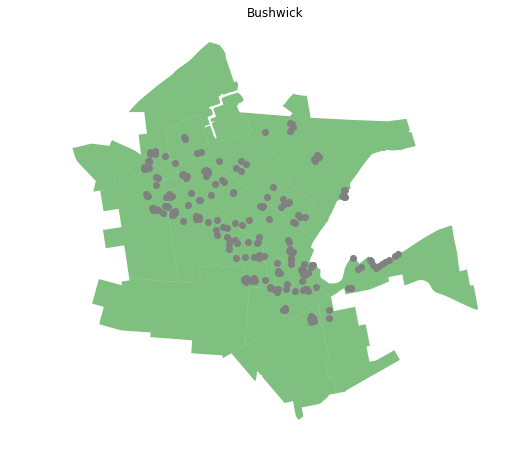

In [171]:
fig, ax= plt.subplots(1,figsize=(8,8))
bushwick_nta.plot(ax=ax,color='green',alpha=.5)
bushwick.plot(ax=ax,color='gray')
plt.axis('off')
plt.title('Bushwick');

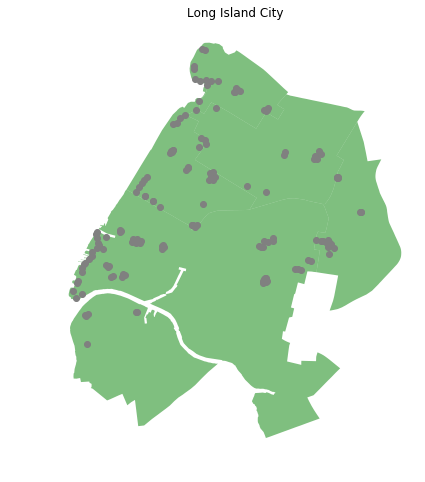

In [172]:
fig, ax= plt.subplots(1,figsize=(8,8))
lic_nta.plot(ax=ax,color='green',alpha=.5)
lic.plot(ax=ax,color='gray')
plt.axis('off')
plt.title('Long Island City');

In [201]:
bayst_mask= health['NTA_Code'].isin(bayst_nta['ntacode'])
bushwick_mask= health['NTA_Code'].isin(bushwick_nta['ntacode'])
lic_mask= health['NTA_Code'].isin(lic_nta['ntacode'])
#Nhood Masks

## Neighborhood Health Summary Tables

In [207]:
bayst_indic= health[bayst_mask][health_indic].mean()
bayst_indic

ChildAsthmaHosp        25.650
MedicaidChildAsthma    15.200
BlackCarbon             0.775
SulfurDioxide           0.375
Ozone                  30.350
PM25                    8.450
PoorControlDiabAll     18.800
dtype: float64

In [208]:
bushwick_indic= health[bushwick_mask][health_indic].mean()
bushwick_indic

ChildAsthmaHosp        50.500000
MedicaidChildAsthma    12.983333
BlackCarbon             0.958333
SulfurDioxide           0.558333
Ozone                  30.700000
PM25                    9.475000
PoorControlDiabAll     21.691667
dtype: float64

In [254]:
lic_indic= health[lic_mask][health_indic].mean()
lic_indic

ChildAsthmaHosp        19.500000
MedicaidChildAsthma    11.400000
BlackCarbon             1.200000
SulfurDioxide           0.783333
Ozone                  30.650000
PM25                    9.966667
PoorControlDiabAll     17.166667
dtype: float64

In [255]:
citywide

ChildAsthmaHosp        29.977436
MedicaidChildAsthma    12.317949
BlackCarbon             0.952821
SulfurDioxide           0.716923
Ozone                  29.767692
PM25                    8.944615
PoorControlDiabAll     16.808205
dtype: float64

In [224]:
summary= pd.DataFrame(data= np.array([bayst_indic.values,bushwick_indic.values, lic_indic.values]).T,index=lic_indic.index,columns=['Bay St. Corridor','Bushwick','LIC'])
summary

,Bay St. Corridor,Bushwick,LIC
ChildAsthmaHosp,25.650,50.500000,19.500000
MedicaidChildAsthma,15.200,12.983333,11.400000
BlackCarbon,0.775,0.958333,1.200000
SulfurDioxide,0.375,0.558333,0.783333
Ozone,30.350,30.700000,30.650000
PM25,8.450,9.475000,9.966667
PoorControlDiabAll,18.800,21.691667,17.166667


In [244]:
summary.subtract(citywide,axis=0)

,Bay St. Corridor,Bushwick,LIC
ChildAsthmaHosp,-4.327436,20.522564,-10.477436
MedicaidChildAsthma,2.882051,0.665385,-0.917949
BlackCarbon,-0.177821,0.005513,0.247179
SulfurDioxide,-0.341923,-0.158590,0.066410
Ozone,0.582308,0.932308,0.882308
PM25,-0.494615,0.530385,1.022051
PoorControlDiabAll,1.991795,4.883462,0.358462


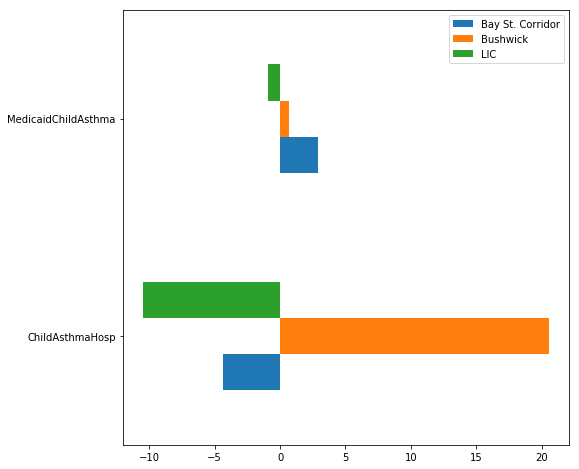

In [252]:
summary.loc[:'MedicaidChildAsthma',:].subtract(citywide.loc[:'MedicaidChildAsthma'].values,axis=0).plot.barh(figsize=(8,8))
plt.savefig(join(path_exp,'190806_NhoodSumm.pdf'));

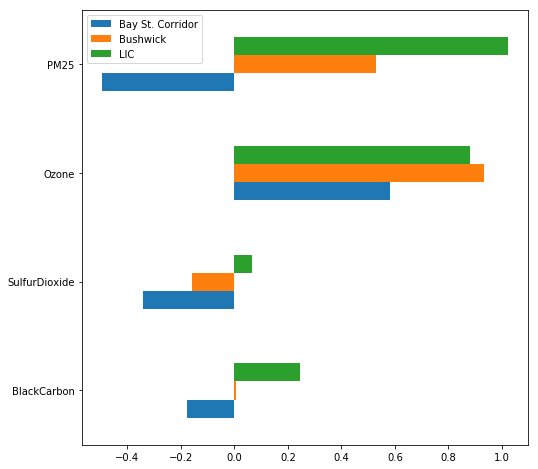

In [253]:
summary.loc['BlackCarbon':'PM25',:].subtract(citywide.loc['BlackCarbon':'PM25'].values,axis=0).plot.barh(figsize=(8,8))
plt.savefig(join(path_exp,'190806_NhoodSumm2.pdf'));